# Procesando el estudio del DANE

Tome las tablas en el [estudio del DANE de 2018](https://www.dane.gov.co/files/censo2018/informacion-tecnica/presentaciones-territorio/190711-CNPV-presentacion-valle.pdf) y los converti en varios archivos CSV. Aqui, yo voy a...
- Filtrar la informacion mas relevante para las graficas del Dashboard.
- Crear unas graficas aqui con Python para tener una prevista de como se deberian ver en el sitio web con JavaScript y Apex Charts.

Exclui algunas tablas del estudio en este ejercicio, pues no se utilizaron en la seccion de **Determinantes** (aunque puedo volver y convertir las tablas faltantes a CSVs tambien si es necesario para otras secciones).

Cada tabla que **si** fue incluida en este script tiene su propia seccion (en ningun orden particular). Son:
- **Cobertura de Servicios Publicos**
- **Contraste de la población general censada por comuna
Cali**
- **Hogares según tamaño y distribución
de la población**
- **Indicadores demográficos**
- **Reporte de cobertura en Valle del Cauca** 
- **Hogares y viviendas, con totales, por municipio**
- **Variación porcentual de viviendas, hogares y personas entre el CG2005 y CNPV 2018, de los municipios de la Provincia del Sur**

In [ ]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicando el tema por defecto de Seaborn para utilizar mas tarde
sns.set_theme()

# https://www.statology.org/seaborn-barplot-show-values/
# https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Cobertura Servicios

En el perfil, hay una infografia dedicada a la cobertura de servicios publicos. Podemos convertir este CSV a una grafica similar.

In [ ]:
# Leyendo de CSV
df_cobser = pd.read_csv('cobertura_servicios.csv')

# Imprimiendo Dataframa para confirmar
df_cobser

,Informacion de Viviendas,Municipio/Departamento,Energia electrica,Acueducto,Alcantarillado,Gas,Recoleccion basuras,Internet
0,CNPV 2018,Colombia,96.3%,86.4%,76.6%,67.3%,81.6%,43.8%
1,CNPV 2018,Valle del Cauca,98.8%,95.4%,90.9%,82.1%,93.9%,56.0%
2,CNPV 2018,Cali,99.7%,99.0%,97.8%,89.6%,99.1%,72.0%
3,CG 2005,Colombia,93.5%,83.3%,73.0%,40.4%,ND,ND
4,CG 2005,Valle del Cauca,97.8%,93.9%,89.6%,46.8%,ND,ND
5,CG 2005,Cali,99.0%,98.1%,96.7%,61.5%,ND,ND


## Plan de Accion

Lo que pienso hacer es:
- Tomar los datos de 2018, pues son mas recientes.
- Tomar los datos de Cali.
- Convertir los datos de 2018 a una grafica, quizas un histograma o grafica de barras o algo similar.

In [ ]:
# Para esto, solo necesito seleccionar la tercera fila
# y quitar caracter de % para conversion a numero mas facil
row = df_cobser.iloc[[2]]
row = row.replace(to_replace="%",value="",regex=True)

# Borraremos las columnas de Informacion de Viviendas y Cali para quedarnos
# con los numeros
row.drop("Informacion de Viviendas", axis=1, inplace=True)
row.drop("Municipio/Departamento", axis=1, inplace=True)

# Imprimir y verificar
row

,Energia electrica,Acueducto,Alcantarillado,Gas,Recoleccion basuras,Internet
2,99.7,99.0,97.8,89.6,99.1,72.0


In [ ]:
# Sacando los valores para Seaborn
valores = row.values.tolist()
valores = numpy.squeeze(valores)
valores = valores.tolist()

# Convirtiendo strings a numeros
i = 0
for elm in valores:
  valores[i] = float(elm)
  i += 1

for elm in valores:
  print(type(elm))

valores

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


[99.7, 99.0, 97.8, 89.6, 99.1, 72.0]

In [ ]:
servicios = row.columns.tolist()
servicios

['Energia electrica',
 'Acueducto',
 'Alcantarillado',
 'Gas',
 'Recoleccion basuras',
 'Internet']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


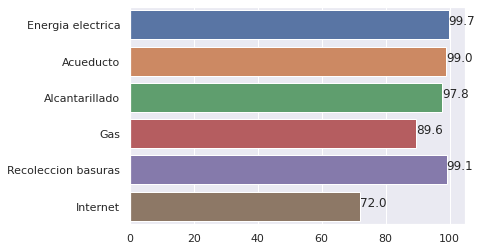

In [ ]:
# Visualizacion con Seaborn
plot = sns.barplot(valores,servicios)
show_values(plot, "h", space=0)

# Contraste Poblacion

In [ ]:
df_conpob = pd.read_csv('contraste_poblacion.csv')

df_conpob

,Area en Cali,Comuna,Total Personas CNPV 2018,Total Personas CG2005,Variacion Porcentual
0,Cabecera municipal,1,49214,61999,-20.6%
1,Cabecera municipal,2,98702,102080,-3.3%
2,Cabecera municipal,3,27000,44308,-39.1%
3,Cabecera municipal,4,45112,55965,-19.4%
4,Cabecera municipal,5,92171,99844,-7.7%
5,Cabecera municipal,6,123740,169392,-27.0%
6,Cabecera municipal,7,57720,77775,-25.8%
7,Cabecera municipal,8,80504,97335,-17.3%
8,Cabecera municipal,9,29887,48382,-38.2%
9,Cabecera municipal,10,84127,103671,-18.9%


## Plan de Accion
Podemos convertir esto a un Heatmap, o sacar un mapa del estudio como tal.

# Poblacion de Hogares

In [ ]:
df_pobhog = pd.read_csv('hogares_poblacion.csv')

df_pobhog

,Tamaño del hogar,Municipio/Departamento,1 personas en el hogar,2 personas en el hogar,3 personas en el hogar,4 personas en el hogar,5 personas en el hogar,6 o mas personas en el hogar
0,CNPV 2018,Colombia,18.6%,21.8%,23.3%,19.5%,9.6%,7.3%
1,CNPV 2018,Valle del Cauca,18.7%,23.5%,24.6%,18.9%,8.3%,6.0%
2,CNPV 2018,Cali,18.6%,23.6%,24.8%,19.0%,8.2%,5.7%
3,CG 2005,Colombia,11.1%,15.2%,19.9%,20.6%,14.9%,18.3%
4,CG 2005,Valle del Cauca,12.2%,15.9%,20.8%,20.8%,13.6%,16.6%
5,CG 2005,Cali,12.8%,15.4%,20.3%,21.4%,13.9%,16.1%


## Plan de Accion

Por el momento, no necesitamos estos datos.

# Indicadores Demograficos

In [ ]:
df_inddem = pd.read_csv('indicadores_demograficos.csv')

df_inddem

,INDICADORES DEMOGRAFICOS,Colombia CNPV 2018,Colombia CG 2005,Valle del Cauca CNPV 2018,Valle del Cauca CG 2005,Cali CNPV 2018,Cali CG 2005
0,Porcentaje de hombres,48.8%,49.0%,47.5%,48.0%,46.8%,47.2%
1,Porcentaje de mujeres,51.2%,51.0%,52.5%,52.0%,53.2%,52.8%
2,Relacion de masculinidad,95.5,96.2,90.5,92.3,87.9,89.4
3,Indice de dependencia demografica,46.5,58.8,44.0,55.0,41.5,51.3
4,Indice de envejecimiento,40.4,20.5,58.2,24.5,65.3,25.6
5,Relacion ninos mujer,25.6,36.8,21.2,31.3,19.4,28.4
6,Poblacion entre 0 y 14 anos (%),22.6%,30.7%,19.3%,28.5%,17.7%,27.0%
7,Poblacion entre 15 y 64 anos (%),68.3%,63.0%,69.4%,64.5%,70.7%,66.1%
8,Poblacion mayor a 65 (%),9.1%,6.3%,11.2%,7.0%,11.6%,6.9%


## Plan de Accion

El Perfil si tiene una grafica de Poblacion Masculina vs Femenina que podemos recrear con estos datos.

In [ ]:
# Sacando las filas de porcentaje de poblacion M-F

porcentajes = df_inddem.iloc[[0,1]]
porcentajes

,INDICADORES DEMOGRAFICOS,Colombia CNPV 2018,Colombia CG 2005,Valle del Cauca CNPV 2018,Valle del Cauca CG 2005,Cali CNPV 2018,Cali CG 2005
0,Porcentaje de hombres,48.8%,49.0%,47.5%,48.0%,46.8%,47.2%
1,Porcentaje de mujeres,51.2%,51.0%,52.5%,52.0%,53.2%,52.8%


In [ ]:
porcentajes.columns

Index(['INDICADORES DEMOGRAFICOS', 'Colombia CNPV 2018', 'Colombia CG 2005',
       'Valle del Cauca CNPV 2018', ' Valle del Cauca CG 2005',
       'Cali CNPV 2018', 'Cali CG 2005'],
      dtype='object')

In [ ]:
# Nos enfocaremos en la columna de Cali mas recien, CNPV 2018

porcentajes.drop("Colombia CNPV 2018", axis=1, inplace=True)
porcentajes.drop("Colombia CG 2005", axis=1, inplace=True)
porcentajes.drop("Valle del Cauca CNPV 2018", axis=1, inplace=True)
porcentajes.drop(" Valle del Cauca CG 2005", axis=1, inplace=True) # corregir!
porcentajes.drop("Cali CG 2005", axis=1, inplace=True)

porcentajes

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,INDICADORES DEMOGRAFICOS,Cali CNPV 2018
0,Porcentaje de hombres,46.8%
1,Porcentaje de mujeres,53.2%


# Reporte Cobertura

In [ ]:
df_repcob = pd.read_csv('reporte_cobertura.csv')

df_repcob

,Municipio,Cobertura en predios,Marco Censal,Porcentaje
0,CALI,704704,697232,101.1%
1,ANDALUCÍA,8689,6422,135.3%
2,PALMIRA,118813,95798,124.0%
3,LA CUMBRE,8571,6678,128.3%
4,BUENAVENTURA,100488,84029,119.6%
5,GINEBRA,8486,7638,111.1%
6,TULUÁ,76014,52982,143.5%
7,BOLÍVAR,8202,7779,105.4%
8,JAMUNDÍ,56268,44375,126.8%
9,ANSERMANUEVO,7942,5894,134.7%


# Totales Municipios

In [ ]:
df_totmun = pd.read_csv('totales_municipios.csv')

df_totmun

,Municipio,Total unidades de vivienda con personas presentes 2018,Total hogares 2018,Total personas general 2018,Total unidades de vivienda con personas presentes 2005,Total hogares 2005,Total personas general 2005,Variación % de personas 2018-2005
0,CALI,598156,611877,1822871,501626,554918,2075380,-12.2%
1,CALIMA,5350,5639,16054,4256,4520,15111,6.2%
2,CANDELARIA,24178,25870,84659,16200,18878,68820,23.0%
3,DAGUA,13886,14231,39665,9379,9701,34310,15.6%
4,EL CERRITO,17071,17648,53983,12077,13939,53244,1.4%
5,FLORIDA,16655,17227,54207,12886,14018,54626,-0.8%
6,JAMUNDÍ,41041,41733,131806,22021,24026,93556,40.9%
7,PALMIRA,103070,105387,302642,67272,74940,278358,8.7%
8,PRADERA,12670,13780,43552,10293,11895,47755,-8.8%
9,VIJES,3412,3532,10766,2454,2790,9592,12.2%


# Provincias

In [ ]:
df_vpps = pd.read_csv('var_porcentual_provincia_sur.csv')

df_vpps

,Municipio,Viviendas ocupadas con personas presentes,Hogares,Personas en Hogares particulares
0,76001 - Cali,19.2%,10.3%,-12.2%
1,76130 - Candelaria,49.2%,37.0%,23.3%
2,76233 - Dagua,48.1%,46.7%,16.4%
3,76275 - Florida,29.2%,22.9%,-0.6%
4,76364 - Jamundi,86.4%,73.7%,36.7%
5,76377 - La Cumbre,42.6%,43.5%,19.0%
6,76520 - Palmira,53.2%,40.6%,8.5%
7,76563 - Pradera,23.1%,15.8%,-8.7%
8,76869 - Vijes,39.0%,26.6%,12.0%
9,76892 - Yumbo,34.7%,27.9%,4.8%
